EDA- Uber Challenge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


1. Loading and inspect your data

In [13]:
#loading data
df = pd.read_csv("train.csv")
df.head()

,EventId,Occurrence Local Date Time,Reporting Agency,Cause,Subcause,Status,longitude,latitude,road_segment_id
0,60558,01/01/16 00:53,Cam,Stationary Vehicle,Vehicle On Shoulder,Closed,18.5408955032,-33.888275,S0B3CGQ
1,60559,01/01/16 00:54,CAMERA,Accident,With A Fixed Object,Closed,18.9307563219,-34.140857,RYJYAPI
2,60560,01/01/16 02:26,Law Enforcement,Accident,Multi Vehicle,Closed,18.5533575029,-33.959154,U3KP57C
3,60561,01/01/16 02:56,CAMERA,Stationary Vehicle,Vehicle On Shoulder,Closed,18.6775561589,-33.895258,RY0TRQ8
4,60562,01/01/16 03:40,CAMERA,Accident,Multi Vehicle,Closed,18.8371319682,-34.087051,8LOVJZ3


In [3]:
#inspection
df.shape

(53845, 9)

In [4]:
df.columns

Index(['EventId', 'Occurrence Local Date Time', 'Reporting Agency', 'Cause',
       'Subcause', 'Status', 'longitude', 'latitude', 'road_segment_id'],
      dtype='object')

In [5]:
df.describe()

,EventId,latitude
count,53845.000000,53845.000000
mean,106497.340403,-33.947960
std,27960.354177,0.511146
min,60558.000000,-34.153087
25%,83043.000000,-33.993621
50%,107083.000000,-33.950250
75%,131294.000000,-33.916789
max,152149.000000,18.839681


In [6]:
df.apply('nunique')

EventId                       53845
Occurrence Local Date Time    50499
Reporting Agency                224
Cause                            24
Subcause                         58
Status                            4
longitude                     49132
latitude                      48947
road_segment_id                 549
dtype: int64

2. Clean the data 

In [57]:
df.Status.unique()

array(['Closed'], dtype=object)

In [14]:
#Remove reportig agency column as it does not help our search
#Remove Status as every status = closed
df = df.drop(['Reporting Agency'],axis=1)

In [58]:
df = df.drop(['Status'], axis=1)

In [59]:
df.head()

,EventId,Occurrence Local Date Time,Cause,Subcause,longitude,latitude,road_segment_id
0,60558,2016-01-01 00:53:00,Stationary Vehicle,Vehicle On Shoulder,18.5408955032,-33.888275,S0B3CGQ
1,60559,2016-01-01 00:54:00,Accident,With A Fixed Object,18.9307563219,-34.140857,RYJYAPI
2,60560,2016-01-01 02:26:00,Accident,Multi Vehicle,18.5533575029,-33.959154,U3KP57C
3,60561,2016-01-01 02:56:00,Stationary Vehicle,Vehicle On Shoulder,18.6775561589,-33.895258,RY0TRQ8
4,60562,2016-01-01 03:40:00,Accident,Multi Vehicle,18.8371319682,-34.087051,8LOVJZ3


In [60]:
#remove duplicates

print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(53840, 7)
(0, 7)


In [9]:
# Conclusion: no duplicates

In [61]:
#check data types
df.dtypes

EventId                                int64
Occurrence Local Date Time    datetime64[ns]
Cause                                 object
Subcause                              object
longitude                             object
latitude                             float64
road_segment_id                       object
dtype: object

In [62]:
# turn Occurrence Local Date Time into datetime
df['Occurrence Local Date Time'] = df['Occurrence Local Date Time'].astype('datetime64')
df.dtypes

EventId                                int64
Occurrence Local Date Time    datetime64[ns]
Cause                                 object
Subcause                              object
longitude                             object
latitude                             float64
road_segment_id                       object
dtype: object

In [63]:
#missing values
print(df.isnull().sum())

EventId                       0
Occurrence Local Date Time    0
Cause                         0
Subcause                      0
longitude                     0
latitude                      0
road_segment_id               0
dtype: int64


In [64]:
#Conclusion= no missing values

In [65]:
#Looking for and dealing with outliers 
df.latitude.describe()

count    53840.000000
mean       -33.952846
std          0.064536
min        -34.153087
25%        -33.993628
50%        -33.950253
75%        -33.916790
max        -33.724590
Name: latitude, dtype: float64

/Users/luisasilva/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


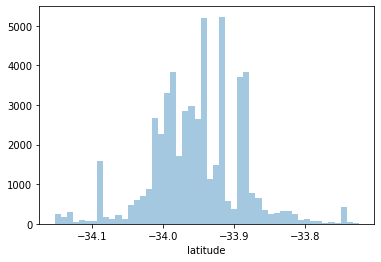

In [66]:
sns.distplot(df['latitude'], kde=False)

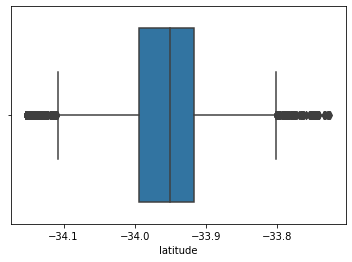

In [67]:
sns.boxplot(df['latitude'])

In [68]:
df.latitude.unique()

array([-33.88827471, -34.14085678, -33.95915443, ..., -33.97097752,
       -33.94919373, -33.88828251])

In [69]:
df = df[df.latitude<-30]
df['latitude'].unique()

array([-33.88827471, -34.14085678, -33.95915443, ..., -33.97097752,
       -33.94919373, -33.88828251])

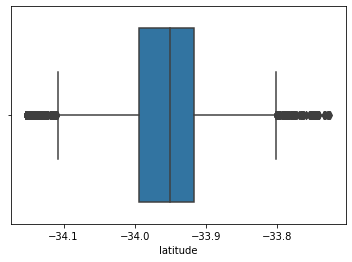

In [70]:
#new boxplot
sns.boxplot(df['latitude'])

Assessing categorical variables 

In [71]:
#remind yourself of data types
df.dtypes

EventId                                int64
Occurrence Local Date Time    datetime64[ns]
Cause                                 object
Subcause                              object
longitude                             object
latitude                             float64
road_segment_id                       object
dtype: object

In [72]:
from ipywidgets import interact, fixed

In [73]:
def categorical_variable_distribution(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()

In [74]:
categorical_columns = df.select_dtypes(
    ['object']).columns.tolist()

In [75]:
interact(categorical_variable_distribution, col=categorical_columns)

interactive(children=(Dropdown(description='col', options=('Cause', 'Subcause', 'longitude', 'road_segment_id'…

<function __main__.categorical_variable_distribution(col)>